# Inverse Transform Method for Generating Random Variables

This notebook provides a detailed explanation and implementation of the **Inverse Transform Method**, a fundamental technique for generating random variables from specific distributions.

We will cover:
1. Synthesizing uniform random variables.
2. Applying the method to generate random variables for:
   - Discrete distributions (PMFs).
   - Continuous distributions (PDFs).

By the end, you’ll understand the theoretical foundation and practical implementation of this method.

## Generating Uniform Random Variables

A **Uniform Random Variable** $U \sim \text{Uniform}(0, 1)$ forms the foundation of many random number generation techniques. A random variable $U$ is said to follow the $\text{Uniform}(0, 1)$ distribution if it satisfies:
1. $U$ takes values in the range $[0, 1)$.
2. All intervals of equal length within $[0, 1)$ are equally probable.

### Methodology for Generating Uniform Random Variables

Modern computers use **pseudo-random number generators (PRNGs)** to create sequences of numbers that mimic randomness. These PRNGs are deterministic algorithms that produce numbers with the following properties:
- **Periodicity**: The sequence eventually repeats after a fixed number of iterations.
- **Uniformity**: The generated numbers are approximately uniformly distributed in $[0, 1)$.
- **Seed-based reproducibility**: The sequence is reproducible given the same initial seed.

Most PRNGs start with a seed value and use iterative mathematical formulas such as the Linear Congruential Generator (LCG):
$$
X_{n+1} = (a X_n + c) \mod m
$$
where $a$, $c$, and $m$ are constants. The output is then normalized to $[0, 1)$ by dividing by $m$.

We will use Python's `numpy.random.uniform` to generate and visualize uniform random variables.

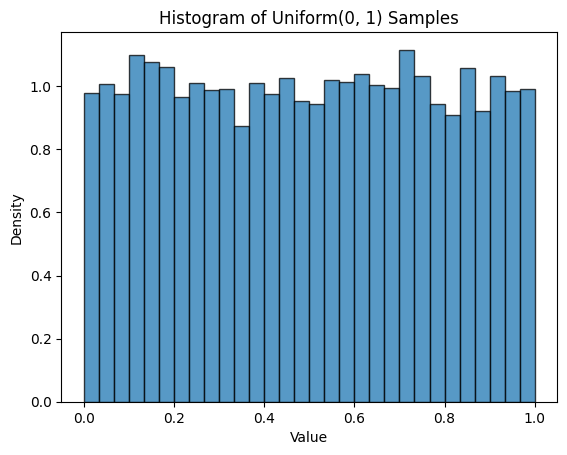

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 10,000 uniform random numbers
n_samples = 10000
uniform_samples = np.random.uniform(0, 1, n_samples)

# Plot histogram
plt.hist(uniform_samples, bins=30, density=True, alpha=0.75, edgecolor='black')
plt.title('Histogram of Uniform(0, 1) Samples')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

## The Inverse Transform Method: Theory

The **Inverse Transform Method** relies on the relationship between a distribution's CDF and its random variable. The steps are as follows:

1. **Start with a uniform random variable** $U \sim \text{Uniform}(0, 1)$.
2. **Define the target distribution’s CDF** $F_X(x)$.
3. **Invert the CDF** to obtain $F_X^{-1}(u)$.
4. **Transform the uniform random variable**:
   $$
   X = F_X^{-1}(U)
   $$
   The resulting random variable $X$ follows the desired distribution.

This works because the CDF maps the uniform range $[0, 1]$ to the range of the target random variable. Inverting this mapping ensures that the generated values follow the correct distribution.

We will first demonstrate this method for a discrete distribution (PMF) and then for a continuous distribution (PDF).


### Discrete Distribution Example: Rolling a Die

Consider a random variable $X$ representing the outcome of a 6-sided die roll. The PMF is:
$$
P(X = x) =
\begin{cases} 
\frac{1}{6}, & x \in \{1, 2, 3, 4, 5, 6\} \\
0, & \text{otherwise}
\end{cases}
$$

The CDF is:
$$
F_X(x) = 
\begin{cases} 
0, & x < 1 \\
\frac{k}{6}, & x \in [k, k+1) \, \text{for } k = 1, 2, ..., 6 \\
1, & x \geq 6
\end{cases}
$$

Using the inverse transform method, we generate a uniform random variable $U \sim \text{Uniform}(0, 1)$ and map it to $X$ using the CDF intervals.


4


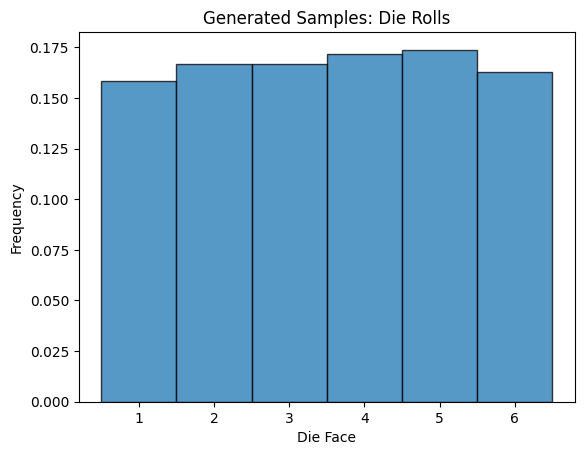

In [17]:
# Define CDF for a 6-sided die
die_faces = np.array([1, 2, 3, 4, 5, 6])
probabilities = np.array([1/6] * 6)  # Uniform probabilities

# Compute the cumulative probabilities (CDF)
cumulative_probs = np.cumsum(probabilities)

# Function to generate samples using the inverse transform method
def inverse_transform_discrete(cdf, values, n_samples):
    uniform_samples = np.random.uniform(0, 1, n_samples)
    generated_samples = []
    for u in uniform_samples:
        # Find the corresponding value for each uniform sample
        index = np.searchsorted(cdf, u)
        generated_samples.append(values[index])
    return np.array(generated_samples)

def ivt():
    F = 1/6 # initial probability mass
    p = 1/6 # probability mass as a function of a (fixed in this instance)
    a = 1 # outcome in the sample space
    U = np.random.uniform(0, 1) # Standard Uniform Draw
    while U > F: # Incrementing the CDF by the PMF until probability threshold is met
        F += p
        a += 1
    return a

print(ivt())

# Generate samples
n_samples = 10000
generated_die_rolls = inverse_transform_discrete(cumulative_probs, die_faces, n_samples)

# Plot histogram
plt.hist(generated_die_rolls, bins=np.arange(0.5, 7.5, 1), density=True, alpha=0.75, edgecolor='black')
plt.title('Generated Samples: Die Rolls')
plt.xlabel('Die Face')
plt.ylabel('Frequency')
plt.show()

### Continuous Distribution Example: Exponential Distribution

For an exponential random variable $X$, the PDF is:
$$
f_X(x) = \lambda e^{-\lambda x}, \quad x \geq 0
$$

The CDF is:
$$
F_X(x) = 1 - e^{-\lambda x}
$$

The inverse CDF is:
$$
F_X^{-1}(u) = -\frac{\ln(1 - u)}{\lambda}
$$

Using the inverse transform method, we can generate exponential random variables by transforming $U \sim \text{Uniform}(0, 1)$.


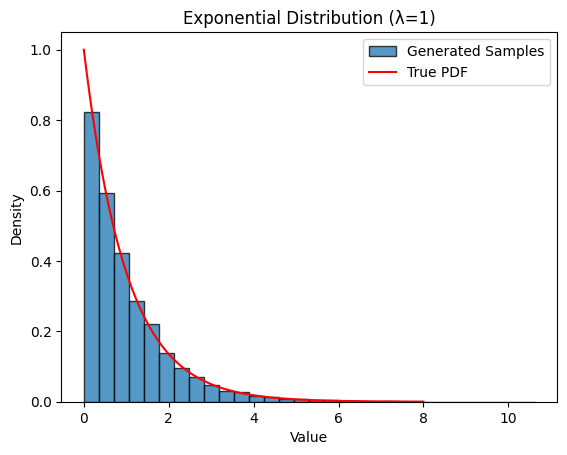

In [18]:
# Parameters for the exponential distribution
lam = 1.0  # Rate parameter (lambda)

# Inverse CDF function for the exponential distribution
def inverse_cdf_exponential(u, lam):
    return -np.log(1 - u) / lam

# Generate uniform samples and transform them
uniform_samples = np.random.uniform(0, 1, n_samples)
exponential_samples = inverse_cdf_exponential(uniform_samples, lam)

# Plot histogram
plt.hist(exponential_samples, bins=30, density=True, alpha=0.75, edgecolor='black', label='Generated Samples')

# Overlay the true PDF
x = np.linspace(0, 8, 1000)
pdf = lam * np.exp(-lam * x)
plt.plot(x, pdf, 'r-', label='True PDF')
plt.title('Exponential Distribution (λ=1)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

## Conclusion

The Inverse Transform Method is a powerful technique for generating random variables from any distribution with a known and invertible CDF. In this notebook, we demonstrated:
1. Generating uniform random variables and understanding PRNG methodology.
2. Applying the method to discrete and continuous distributions.

This approach is foundational in random number generation and widely used in simulations and statistical modeling.
